#Prerequsites

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset

In [145]:
data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv', header=None)

In [146]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [147]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     4
10    0
dtype: int64

In [148]:
data = data[data[9].notna()]

In [149]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts) 

In [150]:
data.columns = ['age','gender','TB', 'DB' , 'AAP' , 'sgpt' , 'sgot' , 'TP' , 'ALB' , 'AG' , 'selector']

In [151]:
data.shape

(579, 11)

In [152]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
sgpt        0
sgot        0
TP          0
ALB         0
AG          0
selector    0
dtype: int64

In [153]:
data.dtypes

age           int64
gender       object
TB          float64
DB          float64
AAP           int64
sgpt          int64
sgot          int64
TP          float64
ALB         float64
AG          float64
selector      int64
dtype: object

In [154]:
desc = pd.DataFrame(data.dtypes, columns= ['Types'])
desc['Max'] = ''
desc['Min'] = ''
desc['Unique'] = ''
for e , row in desc.iterrows():
  if row['Types'] != 'object':
    desc.loc[e , 'Max'] = data[e].max()
    desc.loc[e , 'Min'] = data[e].min()
    desc.loc[e , 'Unique'] = len(data[e].unique())

In [155]:
desc

,Types,Max,Min,Unique
age,int64,90,4,72
gender,object,,,
TB,float64,75,0.4,113
DB,float64,19.7,0.1,80
AAP,int64,2110,63,262
sgpt,int64,2000,10,152
sgot,int64,4929,10,177
TP,float64,9.6,2.7,58
ALB,float64,5.5,0.9,40
AG,float64,2.8,0.3,69


In [156]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [157]:
dum = pd.get_dummies(data['gender'])

In [158]:
sure = pd.merge(data , dum , left_index=True , right_index=True)

In [159]:
sure = sure.drop(['gender','Male'], axis=1)

In [160]:
sure

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0


In [161]:
sure.duplicated().sum()

13

In [162]:
sure.drop_duplicates(inplace= True)

In [163]:
sure.duplicated().sum()

0

#EDA

In [164]:
toeda = sure.copy()

##For class balance

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


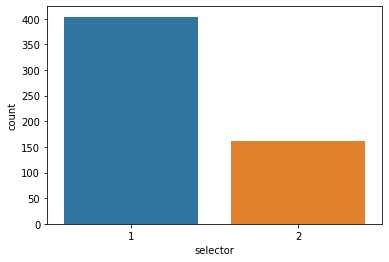

In [165]:
sns.countplot(toeda['selector'])

In [166]:
toeda['selector'].value_counts()

1    404
2    162
Name: selector, dtype: int64

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

##Correlation

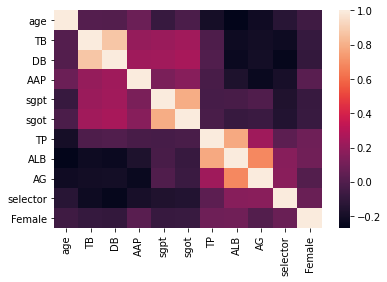

In [167]:
sns.heatmap(toeda.corr())

In [168]:
toeda.corr()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.133821,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.224467,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.250926,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,-0.186057,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.161617,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.151009,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.036443,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.165273,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402,0.005611
selector,-0.133821,-0.224467,-0.250926,-0.186057,-0.161617,-0.151009,0.036443,0.165273,0.171402,1.000000,0.077396


##Distribution vs optimum

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


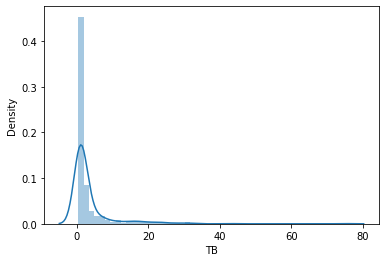

In [169]:
sns.distplot(toeda['TB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


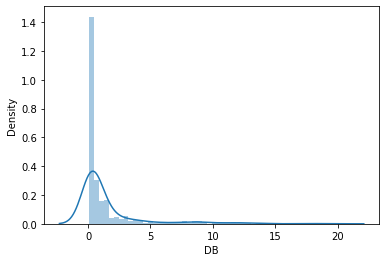

In [170]:
sns.distplot(toeda['DB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


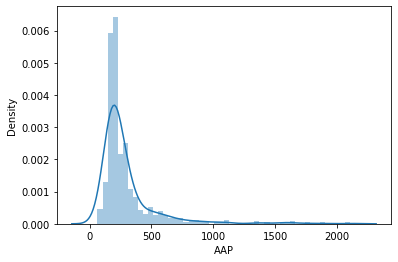

In [171]:
sns.distplot(toeda['AAP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


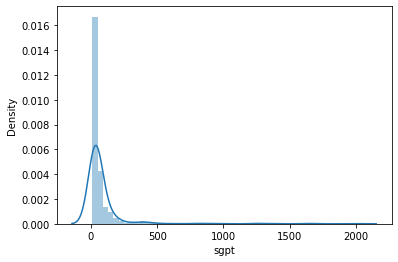

In [172]:
sns.distplot(toeda['sgpt'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


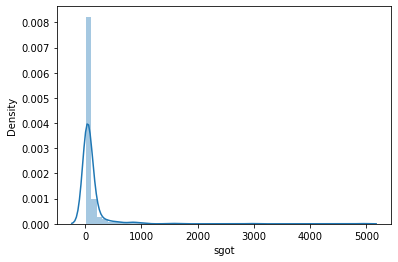

In [173]:
sns.distplot(toeda['sgot'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


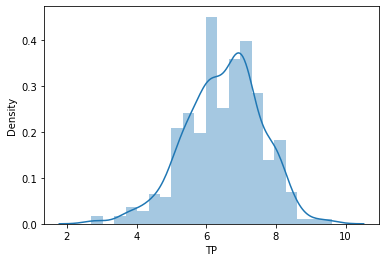

In [174]:
sns.distplot(toeda['TP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


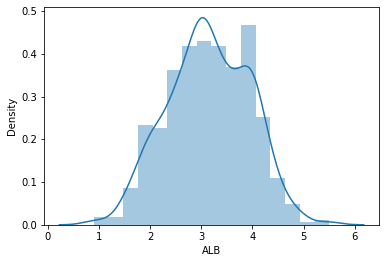

In [175]:
sns.distplot(toeda['ALB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


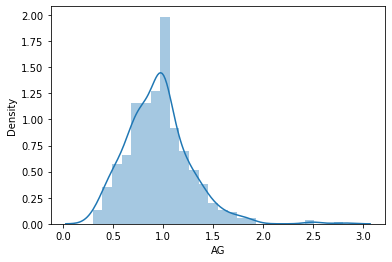

In [176]:
sns.distplot(toeda['AG'])

#VIF

In [177]:
# independent_only = data.drop(columns=['Serial No.', 'admit_chance'])

# correlations = independent_only.corr()

# correlations

In [ ]:
# pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

In [178]:
correlations = toeda.corr()

In [179]:
correlations.drop(['selector'], axis=1, inplace=True)
correlations.drop(['selector'], axis=0, inplace=True)

In [180]:
correlations

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.005611
Female,-0.057542,-0.089068,-0.100448,0.024879,-0.083336,-0.080593,0.092049,0.093208,0.005611,1.000000


In [181]:
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

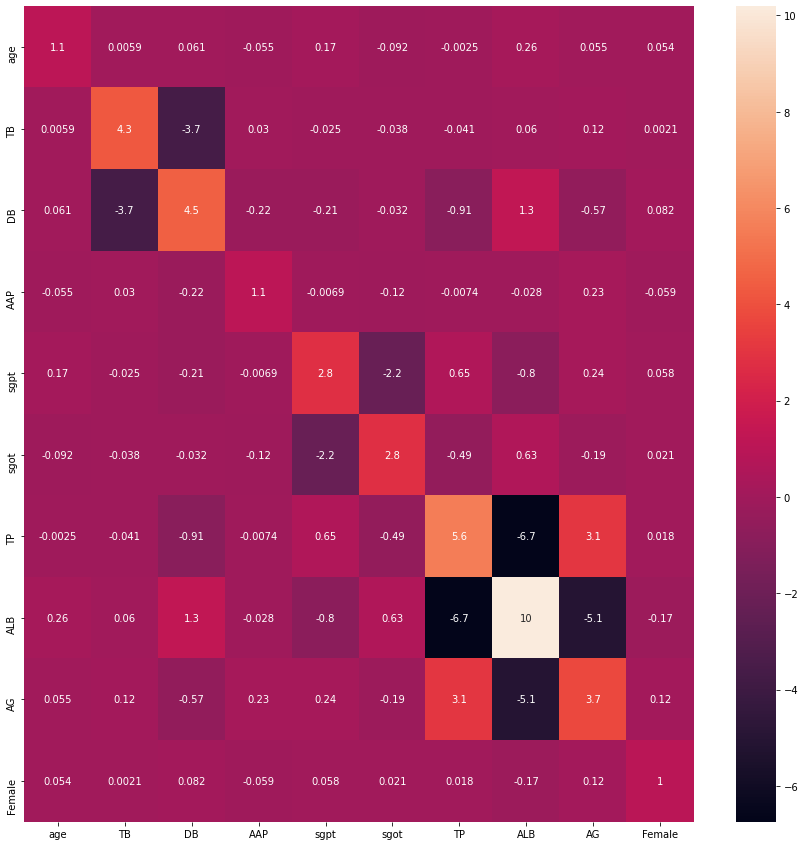

In [182]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

In [191]:
rev = toeda.drop(['ALB','selector'], axis=1)


In [192]:
correlations = rev.corr()
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

In [193]:
vif

,age,TB,DB,AAP,sgpt,sgot,TP,AG,Female
age,1.094204,0.004392,0.028029,-0.054116,0.189147,-0.108248,0.168711,0.183529,0.057995
TB,0.004392,4.256879,-3.681829,0.030356,-0.020103,-0.042154,-0.001678,0.147661,0.003072
DB,0.028029,-3.681829,4.346948,-0.217777,-0.105483,-0.112075,-0.060783,0.070552,0.103114
AAP,-0.054116,0.030356,-0.217777,1.121474,-0.009134,-0.121437,-0.025939,0.213188,-0.059544
sgpt,0.189147,-0.020103,-0.105483,-0.009134,2.755336,-2.149684,0.117533,-0.153296,0.045137
sgot,-0.108248,-0.042154,-0.112075,-0.121437,-2.149684,2.769122,-0.070594,0.120811,0.031625
TP,0.168711,-0.001678,-0.060783,-0.025939,0.117533,-0.070594,1.100568,-0.244321,-0.091732
AG,0.183529,0.147661,0.070552,0.213188,-0.153296,0.120811,-0.244321,1.199799,0.038214
Female,0.057995,0.003072,0.103114,-0.059544,0.045137,0.031625,-0.091732,0.038214,1.029989


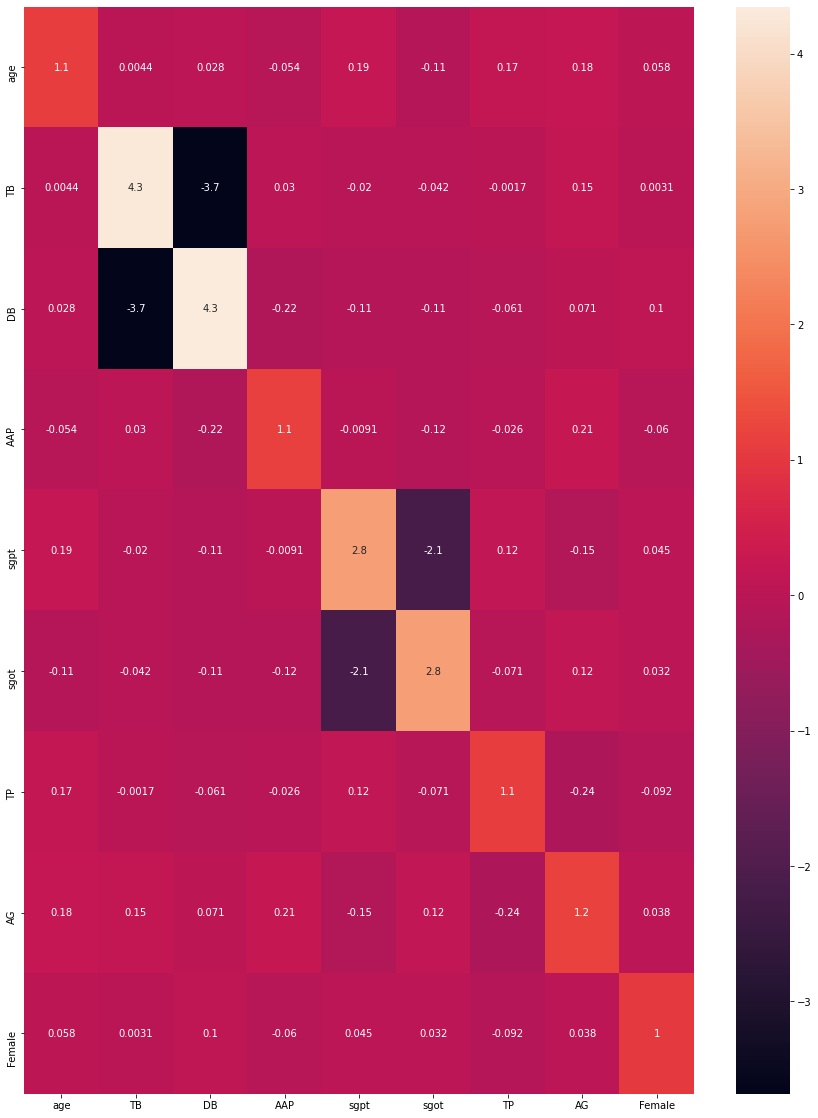

In [194]:
plt.figure(figsize=(15,20))
sns.heatmap(vif, annot=True)

plt.show()

# NB
 - Drop ALB

# Models

In [197]:
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

In [198]:
y.value_counts()

1    404
2    162
Name: selector, dtype: int64

In [199]:
from imblearn.under_sampling import NearMiss

In [200]:
nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [201]:
np.unique(y, return_counts=True)

(array([1, 2]), array([162, 162]))

## RandomForestClassifier

In [202]:
test_features = data.columns.to_list()
test_features.remove('selector')

In [203]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [204]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min


In [209]:
from sklearn.ensemble import RandomForestClassifier

for i in range(0,20):
  forest = RandomForestClassifier(n_estimators = 90, 
                                random_state = i, 
                                min_samples_split=8,
                                min_samples_leaf=4,
                                max_features='sqrt',
                                max_depth=90,
                                class_weight='balanced_subsample',
                                n_jobs = -1
                                ) 

  forest = forest.fit(x_train, y_train)
  y_pred = forest.predict(x_test)

  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix

  print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

  confusion_matrix = confusion_matrix(y_test, y_pred)
  print('The confusion matrix:')
  confusion_matrix

Accuracy score of 0.5
The confusion matrix:
Accuracy score of 0.45918367346938777
The confusion matrix:
Accuracy score of 0.5
The confusion matrix:
Accuracy score of 0.5
The confusion matrix:
Accuracy score of 0.5
The confusion matrix:
Accuracy score of 0.47959183673469385
The confusion matrix:
Accuracy score of 0.47959183673469385
The confusion matrix:
Accuracy score of 0.4897959183673469
The confusion matrix:
Accuracy score of 0.4897959183673469
The confusion matrix:
Accuracy score of 0.47959183673469385
The confusion matrix:
Accuracy score of 0.5204081632653061
The confusion matrix:
Accuracy score of 0.5408163265306123
The confusion matrix:
Accuracy score of 0.5204081632653061
The confusion matrix:
Accuracy score of 0.5
The confusion matrix:
Accuracy score of 0.5
The confusion matrix:
Accuracy score of 0.5204081632653061
The confusion matrix:
Accuracy score of 0.5408163265306123
The confusion matrix:
Accuracy score of 0.4387755102040816
The confusion matrix:
Accuracy score of 0.5
Th

In [207]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators = 90, 
                               random_state = 1, 
                               min_samples_split=8,
                               min_samples_leaf=4,
                               max_features='sqrt',
                               max_depth=90,
                               class_weight='balanced_subsample',
                               n_jobs = -1
                               ) 

forest = forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

Accuracy score of 0.45918367346938777
The confusion matrix:


array([[21, 33],
       [20, 24]])